In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/cleaned.csv")


In [17]:
df.head(), df.columns

(   item_id  user_id  rating  timestamp  gender    category    brand  year  \
 0        7      131       4      36692  Female  Home Audio  Philips  2000   
 1       19      231       5      36891  Female      Camera    Canon  2000   
 2       14      233       5      36893  Female      Camera    Kodak  2001   
 3       14      257       5      36926  Female      Camera    Kodak  2001   
 4       14      269       5      36952  Female      Camera    Kodak  2001   
 
    month  quantity  unitprice  amount  
 0      6         5       6360   31800  
 1     12        10       9955   99550  
 2      1         9       7639   68751  
 3      2         7       5097   35679  
 4      3        10       6472   64720  ,
 Index(['item_id', 'user_id', 'rating', 'timestamp', 'gender', 'category',
        'brand', 'year', 'month', 'quantity', 'unitprice', 'amount'],
       dtype='object'))

In [21]:
# 1. Best year of sales
year_sales = df.groupby("year")["amount"].sum()
print("Best Year:", year_sales.idxmax())


Best Year: 2015


In [4]:
# 2. Best month of sales
month_sales = df.groupby("month")["amount"].sum()
print("Best Month:", month_sales.idxmax())

Best Month: 1


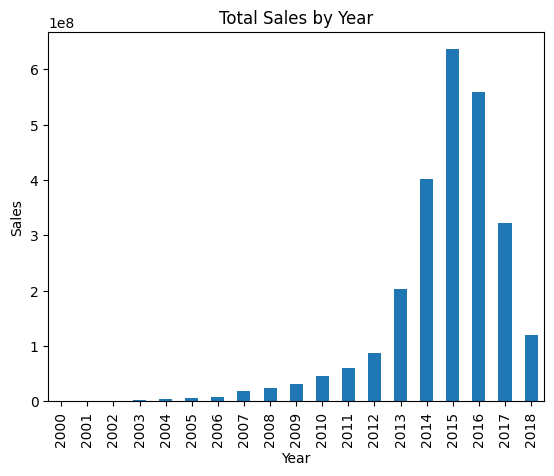

In [5]:
# 3. Year-wise total sales
plt.figure()
year_sales.plot(kind="bar")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [6]:
# 4. Brand sold most (2015–2018)
brand_sales = df[(df.year >= 2015) & (df.year <= 2018)].groupby("brand")["amount"].sum()
print("Top Brand (2015–2018):", brand_sales.idxmax())

Top Brand (2015–2018): Bose


Text(0.5, 1.0, 'Top 5 brands in 2018')

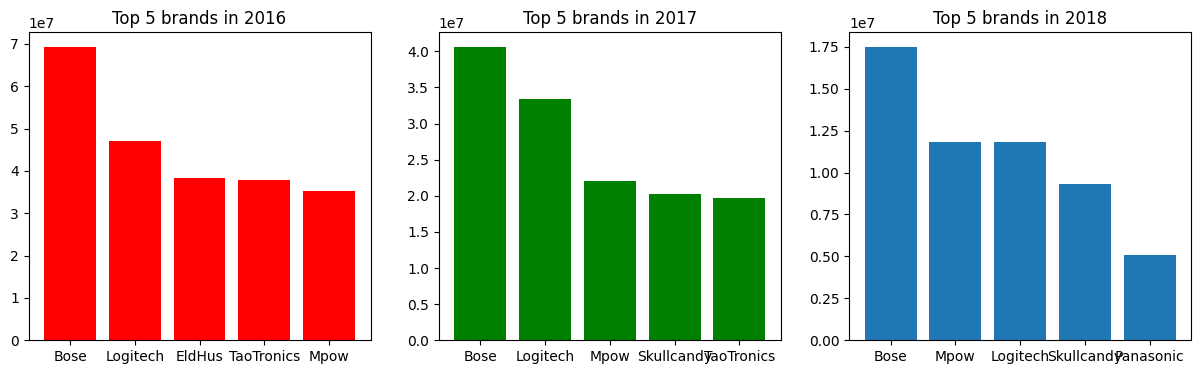

In [23]:
# 5. Create different plots for each year 2016,2017,2018 for top 5 brands sold the most

# filtering data for 2016, 2017 and 2018
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]

# creating brand groups for 2016, 2017 and 2018
brand_group_2016 = df_2016.groupby('brand')['amount'].sum().nlargest(5)
brand_group_2017 = df_2017.groupby('brand')['amount'].sum().nlargest(5)
brand_group_2018 = df_2018.groupby('brand')['amount'].sum().nlargest(5)

# creating subplots
fig, axs = plt.subplots(1,3, figsize=(15,4))

# plot for first subplot
axs[0].bar(brand_group_2016.index, brand_group_2016.values, color='red')
axs[0].set_title('Top 5 brands in 2016')

# plot for first subplot
axs[1].bar(brand_group_2017.index, brand_group_2017.values, color='green')
axs[1].set_title('Top 5 brands in 2017')

# plot for first subplot
axs[2].bar(brand_group_2018.index, brand_group_2018.values)
axs[2].set_title('Top 5 brands in 2018')

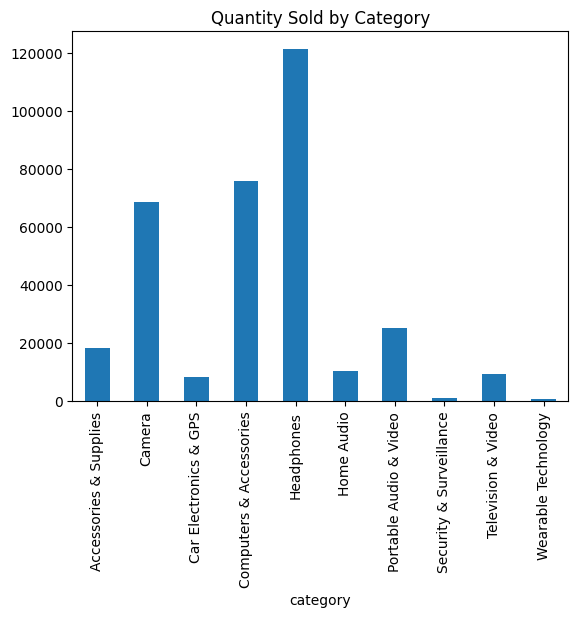

In [9]:
# 6. Product category sold most
category_qty = df.groupby("category")["quantity"].sum()
plt.figure()
category_qty.plot(kind="bar")
plt.title("Quantity Sold by Category")
plt.show()


In [10]:
# 7 & 8. Least sold brand (2015–2018)
print("Least Sold Brand:", brand_sales.idxmin())


Least Sold Brand: Archos


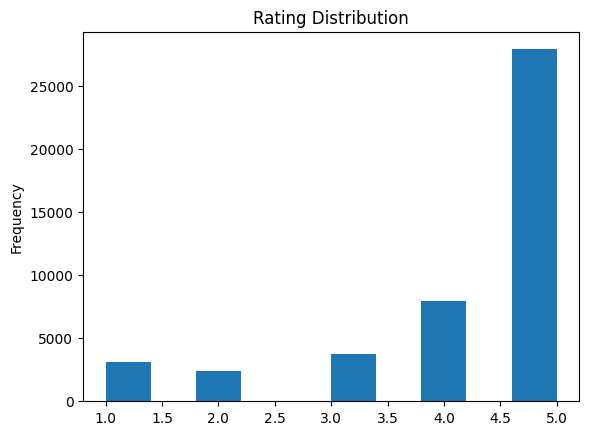

In [11]:
# 9. Rating distribution
plt.figure()
df["rating"].plot(kind="hist")
plt.title("Rating Distribution")
plt.show()



In [12]:
# 10. Most rated brand
top_rated = df[(df.year >= 2015) & (df.year <= 2018)].groupby("brand")["rating"].mean()
print("Most Rated Brand:", top_rated.idxmax())



Most Rated Brand: Savage


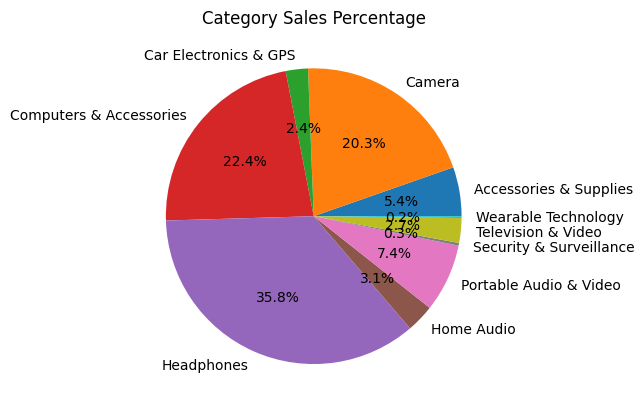

In [13]:
# 11. Category-wise sales percentage
category_pct = category_qty / category_qty.sum() * 100
plt.figure()
category_pct.plot(kind="pie", autopct="%1.1f%%")
plt.title("Category Sales Percentage")
plt.ylabel("")
plt.show()



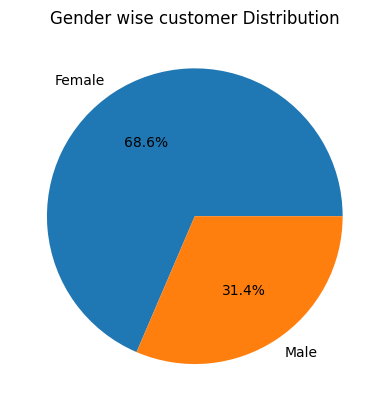

In [24]:
# 12. Gender wise customer distribution
gender_distribution = df['gender'].value_counts()
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender wise customer Distribution')
plt.show()



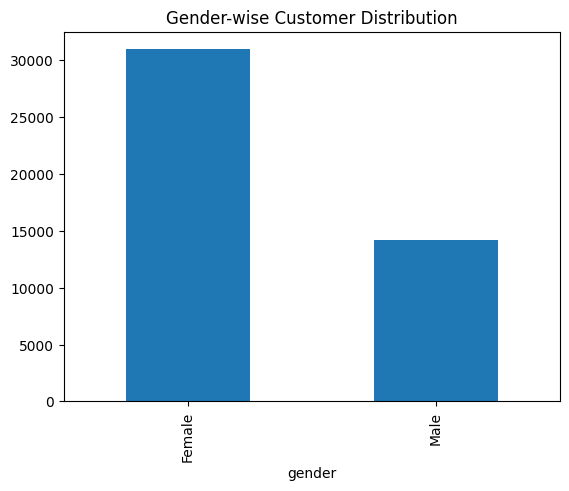

In [15]:
# 13. Gender-wise distribution
plt.figure()
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender-wise Customer Distribution")
plt.show()



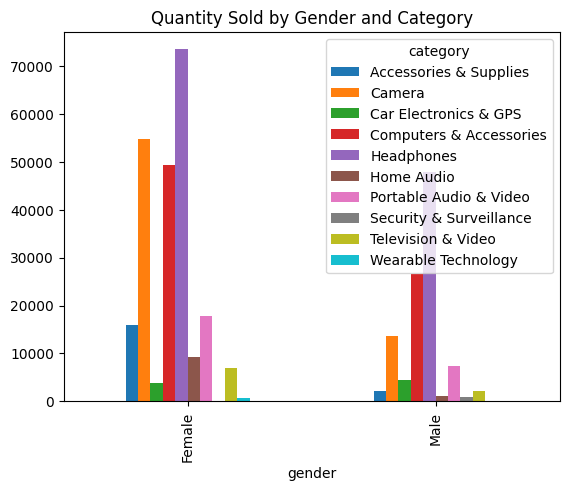

In [16]:
# 14. Gender and category quantity
gender_category = df.groupby(["gender", "category"])["quantity"].sum().unstack()
gender_category.plot(kind="bar")
plt.title("Quantity Sold by Gender and Category")
plt.show()